In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

Read data from .npy files and the corresponding labels showing the presence of signal

In [2]:
df = pd.read_csv("/home/ashok/g2net/data/training_labels.csv")
fnames = []
#path = "/home/ashok/g2net/data/train"
path = "/home/ashok/g2net-gravitational-wave-detection/train/0/0/"
pde = []

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        fnames.append(os.path.join(dirname, filename))
        pde.append(filename)
len(fnames)
fnames[:20]

['/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006d48d9f4.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/0069694349.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/00600ab024.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/0067af3765.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006c272ba6.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006addc0a8.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/0067523973.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/0065697a90.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/0061d6c931.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006fdf8868.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006eeade18.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006bd09135.npy',
 '/home/ashok/g2net-gravitational-wave-detection/train/0/0/6/006

Plot the signal from one of the .npy file for three detectors 

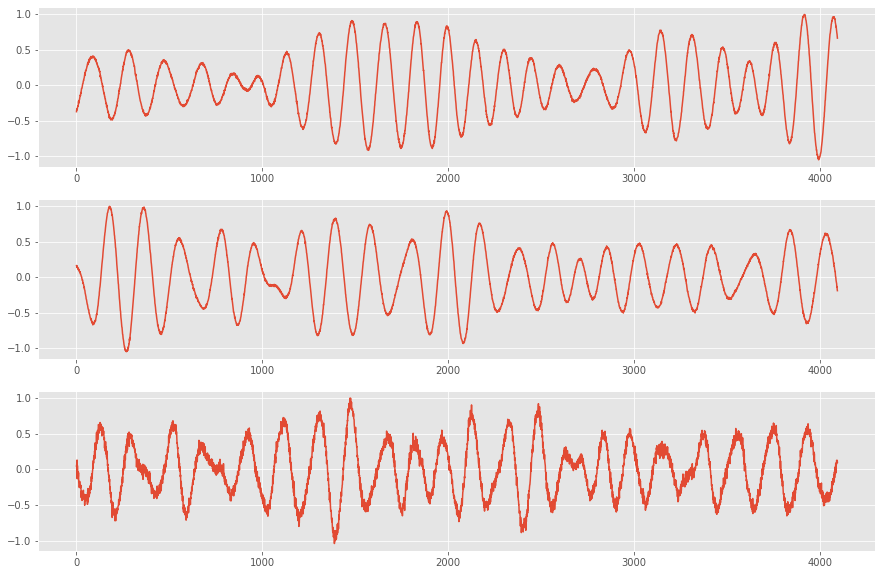

In [3]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 10))

for i in range(3):
    image = np.load(fnames[1])
    ax = plt.subplot(3, 1, i + 1)
    image = image[i, :] / np.max(image[i, :])
    plt.plot(image)

In [4]:
df.head()

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1


In [5]:
df.loc[df["id"] == "000c3049e8"]

,id,target
113,000c3049e8,0


In [6]:
np.shape(image)

(4096,)

# K  Means Clustering

1) Select k initial points as a first guess for the k groups' centroids, which are defined to be the average position of all the points within a group.

2) Group all n points according to which centroid is closest.

3) Recalculate the k centroids using the groups found in step 2.

4) Repeat steps 2 and 3 until you reach a time at which no observations change groups.

Generate some random data to see what K Mean does

In [7]:
np.random.seed(2)
X = np.zeros((30, 2))

X[:10, :] = np.random.randn(10, 2)
X[10:20, :] = np.random.randn(10, 2) + np.array([4, 4])
X[20:, :] = np.random.randn(10, 2) + np.array([-5, 5])

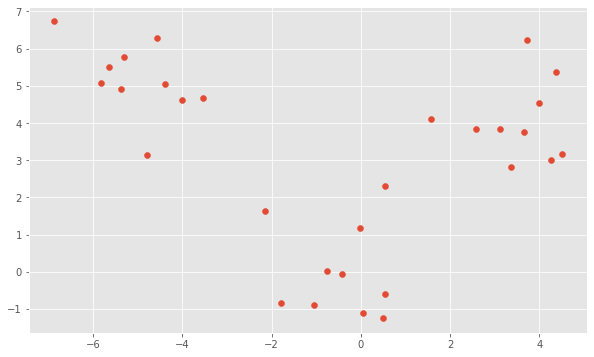

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [9]:
## import KMeans
from sklearn.cluster import KMeans

In [10]:
## Make a KMeans object
## Make a KMeans object
kmeans = KMeans(3)

## Fit the kmeans object
kmeans.fit(X)


## get the clusters
clusters = kmeans.predict(X)

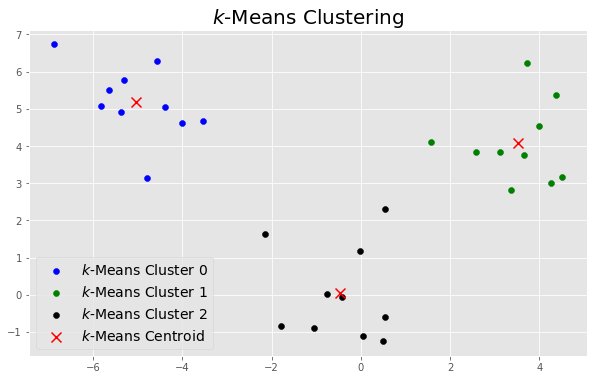

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(
    X[clusters == 0, 0], X[clusters == 0, 1], c="b", label="$k$-Means Cluster 0"
)
plt.scatter(
    X[clusters == 1, 0], X[clusters == 1, 1], c="green", label="$k$-Means Cluster 1"
)
plt.scatter(
    X[clusters == 2, 0], X[clusters == 2, 1], c="k", label="$k$-Means Cluster 2"
)

## You can get the centers with cluster_centers_
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="r",
    marker="x",
    s=100,
    label="$k$-Means Centroid",
)


plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

Load data for GWs

In [12]:
data = np.load(fnames[0])
X_train_L1 = np.array([data[0, :]])
X_train_L2 = np.array([data[1, :]])
X_train_L3 = np.array([data[2, :]])
y_train = [df.loc[df["id"] == pde[0][:-4]]["target"].values[0]]

Create a train data 

In [13]:
i = 1
while True:
    try:
        data = np.load(fnames[i])
        X_train_L1 = np.append(X_train_L1, [data[0, :]], axis=0)
        X_train_L2 = np.append(X_train_L2, [data[1, :]], axis=0)
        X_train_L3 = np.append(X_train_L3, [data[2, :]], axis=0)
        
        value = df.loc[df["id"] == pde[i][:-4]]["target"].values[0]
        y_train = np.append(y_train, value)
    except:
        break
    i += 1

Create a 2 dimensional sklearn object

In [14]:
## Make a KMeans object
## Make a KMeans object
kmeansGW = KMeans(2)

## Fit the kmeans object
kmeansGW.fit(X_train_L2)

## get the clusters
clustersGW = kmeansGW.predict(X_train_L2)

In [15]:
clustersGW

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [16]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [17]:
np.sum(abs(clustersGW-y_train))

1155

In [18]:
len(y_train)

2274

In [19]:
clustersGW_comp = np.ones(len(clustersGW)) - clustersGW

In [20]:
np.sum(abs(clustersGW_comp-y_train))

1119.0

# Linear Support Vector Machines

In [21]:
## import LinearSVC
from sklearn.svm import LinearSVC

In [22]:
## make model
## max_iter just increases the number of iterations for the fitting algorithm
max_margin = LinearSVC(C = 1000, max_iter = 100000)

## fit model
max_margin.fit(X_train_L1, y_train)

LinearSVC(C=1000, max_iter=100000)

In [23]:
linear_SVM = max_margin.predict(X_train_L2)

In [24]:
linear_SVM

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
np.sum(abs(linear_SVM-y_train))

1131

In [26]:
linear_SVM_comp = np.ones(len(linear_SVM)) - linear_SVM

In [27]:
np.sum(abs(linear_SVM_comp-y_train))

1143.0

# K nearest neighbor classifier

In [29]:
## import Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [32]:
## Make the model object
knn = KNeighborsClassifier(n_neighbors = 5)

## Fit the model object
knn.fit(X_train_L1,y_train)

## get the predictions
y_train_pred = knn.predict(X_train_L1)

In [33]:
y_train_pred

array([0, 1, 1, ..., 1, 0, 1])

In [34]:
## now we can import the confusion matrix
## function from sklearn
from sklearn.metrics import confusion_matrix


In [36]:
TN = confusion_matrix(y_train, y_train_pred)[0,0]
FP = confusion_matrix(y_train, y_train_pred)[0,1]
FN = confusion_matrix(y_train, y_train_pred)[1,0]
TP = confusion_matrix(y_train, y_train_pred)[1,1]

confusion_matrix(y_train, y_train_pred)

array([[768, 363],
       [326, 817]])

In [38]:
## import precision and recall
from sklearn.metrics import precision_score, recall_score

## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, y_train_pred),4))

print("The training precision is",
         np.round(precision_score(y_train, y_train_pred),4))


The training recall is 0.7148
The training precision is 0.6924


# Logistic Regression

In [39]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression


In [41]:
## make model object
log_reg = LogisticRegression()

## fit the model
log_reg.fit(X_train_L1, y_train)

LogisticRegression()

In [44]:
## Demonstrate predict
log_reg.predict(X_train_L1)

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, log_reg.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, log_reg.predict(X_train_L1)),4))

The training recall is 1.0
The training precision is 0.5026


In [47]:
## Demonstrate predict_proba
log_reg.predict_proba(X_train_L1)

array([[0.49736148, 0.50263852],
       [0.49736148, 0.50263852],
       [0.49736148, 0.50263852],
       ...,
       [0.49736148, 0.50263852],
       [0.49736148, 0.50263852],
       [0.49736148, 0.50263852]])

In [48]:
## set the cutoff
cutoff = .5

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train_L1)[:,1]

## assign the value based on the cutoff
y_train_pred_log_reg = 1*(y_prob >= cutoff)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred_log_reg == y_train)/len(y_train))

The training accuracy for a cutoff of 0.5 is 0.5026385224274407


In [49]:
## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred_log_reg = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred_log_reg == y_train)/len(y_train))

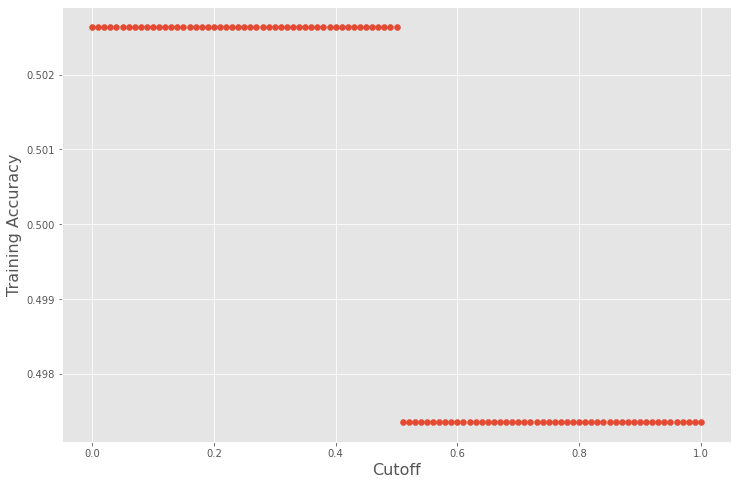

In [50]:
plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

# The ROC Curve


In [54]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [60]:
log_fprs, log_tprs, log_thresholds = roc_curve(y_train, log_reg.predict_proba(X_train_L1)[:,1])
knn_fprs, knn_tprs, knn_thresholds = roc_curve(y_train, knn.predict_proba(X_train_L1)[:,1])

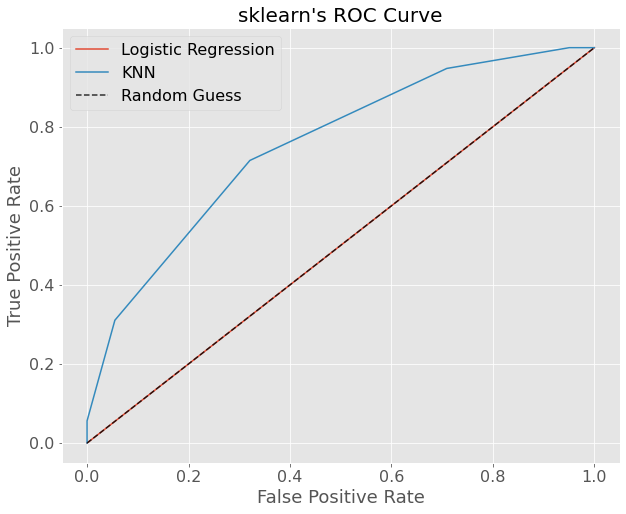

In [61]:
plt.figure(figsize=(10,8))

plt.plot(log_fprs, log_tprs, label="Logistic Regression")
plt.plot(knn_fprs, knn_tprs, label="KNN")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k--', alpha=.8, label="Random Guess")

plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.legend(fontsize=16)

plt.title("sklearn's ROC Curve", fontsize=20)

plt.show()

# Linear and Quadratic Discriminant Analysis

In [62]:
## Import linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
## Make the model object
LDA = LinearDiscriminantAnalysis()

## Fit the object 
LDA.fit(X_train_L1, y_train)

LinearDiscriminantAnalysis()

In [67]:
## Demonstrate predict_proba
LDA.predict_proba(X_train_L1)

array([[0.93003821, 0.06996179],
       [0.06363329, 0.93636671],
       [0.58458766, 0.41541234],
       ...,
       [0.63595839, 0.36404161],
       [0.96347977, 0.03652023],
       [0.95748003, 0.04251997]])

In [80]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, LDA.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, LDA.predict(X_train_L1)),4))

The training recall is 0.874
The training precision is 0.874


In [70]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [71]:
## Make a QDA object
QDA = QuadraticDiscriminantAnalysis()

In [72]:
QDA.fit(X_train_L1, y_train)

/home/ashok/miniconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [73]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, QDA.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, QDA.predict(X_train_L1)),4))

The training recall is 1.0
The training precision is 1.0


In [81]:
confusion_matrix(y_train, QDA.predict(X_train_L1))

array([[1131,    0],
       [   0, 1143]])

# Naïve Bayes Classifier

In [74]:
## import GaussianNB
from sklearn.naive_bayes import GaussianNB

In [75]:
## Make the model
nb = GaussianNB()

## Fit the model
nb.fit(X_train_L1, y_train)

GaussianNB()

In [76]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, nb.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, nb.predict(X_train_L1)),4))

The training recall is 0.5363
The training precision is 0.5459


# General Support Vector Machines

In [77]:
## import SVC
from sklearn.svm import SVC

In [78]:
## make a model
svc = SVC(C=1000, kernel='poly', degree=2)

## fit a model
svc.fit(X_train_L1, y_train)

SVC(C=1000, degree=2, kernel='poly')

In [79]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, svc.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, svc.predict(X_train_L1)),4))

The training recall is 0.9134
The training precision is 0.9031


In [83]:
confusion_matrix(y_train,svc.predict(X_train_L1))

array([[1019,  112],
       [  99, 1044]])

# Decision Trees

In [84]:
## Import packages
## tree will be used to plot the decisiton tree
from sklearn import tree

## This is the actual out of the box algorithm
from sklearn.tree import DecisionTreeClassifier

In [85]:
## Make an decision tree object
tree_clf = DecisionTreeClassifier()


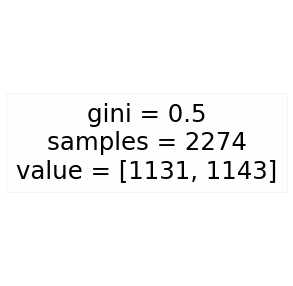

In [87]:
plt.figure(figsize = (5,5))

## Plot the fitted tree
fig = tree_clf.fit(X_train_L1, y_train)
tree.plot_tree(fig, filled = True)
plt.show()


In [88]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, tree_clf.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, tree_clf.predict(X_train_L1)),4))

The training recall is 1.0
The training precision is 0.5026


In [89]:
confusion_matrix(y_train, tree_clf.predict(X_train_L1))

array([[   0, 1131],
       [   0, 1143]])

# Random Forests

In [91]:
## This imports the random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [92]:
## Make a forest, fit the forest
forest = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=614)

forest.fit(X_train_L1,y_train)


RandomForestClassifier(max_depth=2, n_estimators=500, random_state=614)

In [93]:
## print the precision and recall here
print("The training recall is",
         np.round(recall_score(y_train, forest.predict(X_train_L1)),4))

print("The training precision is",
         np.round(precision_score(y_train, forest.predict(X_train_L1)),4))

The training recall is 1.0
The training precision is 0.5026


In [94]:
confusion_matrix(y_train, forest.predict(X_train_L1))

array([[   0, 1131],
       [   0, 1143]])

Compare decision tree and Random Forest at different depth 

In [95]:
## import Stratified Kfold and accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [96]:
max_depth = 20

forest_cv_accs = np.zeros((5, max_depth))
tree_cv_accs = np.zeros((5, max_depth))


max_depths = range(1,max_depth+1)

kfold = StratifiedKFold(5, shuffle=True, random_state=194)

y_train1 = y_train

i = 0
for train_index,test_index in kfold.split(X_train_L1, y_train):
    X_train = X_train_L1[train_index,:]
    X_holdout = X_train_L1[test_index,:]
    y_train = y_train1[train_index]
    y_holdout = y_train1[test_index]
    j = 0
    for depth in max_depths:
        tree = DecisionTreeClassifier(max_depth = depth)
        forest = RandomForestClassifier(n_estimators = 100, 
                                        random_state=512, 
                                        max_samples=100,
                                        max_depth=depth)
        
        tree.fit(X_train, y_train)
        forest.fit(X_train, y_train)
        
        tree_cv_accs[i,j] = accuracy_score(y_holdout, tree.predict(X_holdout))
        forest_cv_accs[i,j] = accuracy_score(y_holdout, forest.predict(X_holdout))
        j = j + 1
    i = i + 1

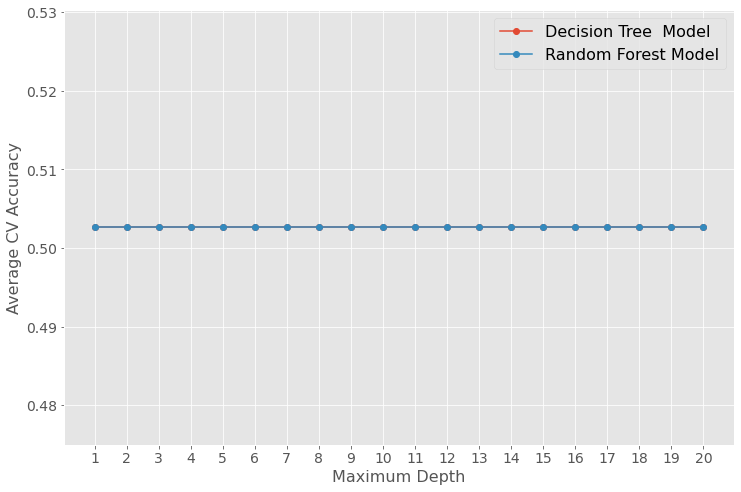

In [100]:
## this plots the average accuracy as a function of the maximum depth
plt.figure(figsize=(12,8))

plt.plot(max_depths, 
         np.mean(tree_cv_accs, axis=0),
         '-o',
         label="Decision Tree  Model")
plt.plot(max_depths, 
         np.mean(forest_cv_accs, axis=0),
         '-o',
         label="Random Forest Model")

plt.legend(fontsize=16)

plt.xlabel("Maximum Depth", fontsize=16)
plt.ylabel("Average CV Accuracy", fontsize=16)

plt.xticks(max_depths, fontsize=14)
plt.yticks(fontsize=14)

plt.show()